In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.metrics import accuracy_score, f1_score

spy_df = pd.read_csv("../../data/finance/csv_files/monthly_spy_data.csv")
spy_df['Date'] = pd.to_datetime(spy_df['Date'])
spy_df['year'] = spy_df['Date'].dt.year
spy_df['month'] = spy_df['Date'].dt.month
spy_df_extracted = spy_df[['year', 'month', 'Close']]

crime_df = pd.read_csv("../../data/crime/monthly_crime.csv")
total_crime_extracted = crime_df[['year', 'month', 'violent_crime', 'homicide', 'robbery', 'aggravated_assault', 'property_crime', 'burglary','motor_vehicle_theft','rape']]

merged_df_spy = pd.merge(total_crime_extracted, spy_df_extracted, on=['year', 'month'], how='inner')

scaler = MinMaxScaler()
features = merged_df_spy.iloc[:, :-1]
features_scaled = scaler.fit_transform(features)

normalizer = Normalizer()
target = merged_df_spy.iloc[:, -1:]
target = normalizer.fit_transform(target)

In [24]:
features_scaled

array([[0.        , 0.81818182, 0.94444444, ..., 0.95689655, 1.        ,
        0.18147448],
       [0.        , 0.90909091, 0.94444444, ..., 0.95689655, 1.        ,
        0.18147448],
       [0.        , 1.        , 0.94444444, ..., 0.95689655, 1.        ,
        0.18147448],
       ...,
       [1.        , 0.81818182, 0.79147105, ..., 0.21845194, 0.66078502,
        0.41776938],
       [1.        , 0.90909091, 0.79147105, ..., 0.21845194, 0.66078502,
        0.41776938],
       [1.        , 1.        , 0.79147105, ..., 0.21845194, 0.66078502,
        0.41776938]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(features_scaled)
features_scaled = pca.transform(features_scaled)

In [18]:
merged_df_spy.head()

,year,month,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,motor_vehicle_theft,rape,Close
0,2005,10,4457,53,1337,2763,32611,6908,3961,302,118.763750
1,2005,11,4457,53,1337,2763,32611,6908,3961,302,124.033809
2,2005,12,4457,53,1337,2763,32611,6908,3961,302,126.317143
3,2006,1,4599,55,1439,2801,32114,7035,3840,302,127.809000
4,2006,2,4599,55,1439,2801,32114,7035,3840,302,127.767370


In [25]:
len(merged_df_spy)

207

In [28]:
features = ["violent_crime","homicide","robbery","aggravated_assault","property_crime","burglary","motor_vehicle_theft","rape"]
features_df = merged_df_spy[features]
features_df.head()

,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,motor_vehicle_theft,rape
0,4457,53,1337,2763,32611,6908,3961,302
1,4457,53,1337,2763,32611,6908,3961,302
2,4457,53,1337,2763,32611,6908,3961,302
3,4599,55,1439,2801,32114,7035,3840,302
4,4599,55,1439,2801,32114,7035,3840,302


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 207 samples in 0.001s...
[t-SNE] Computed neighbors for 207 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 207 / 207
[t-SNE] Mean sigma: 570.830390
[t-SNE] KL divergence after 250 iterations with early exaggeration: 33.557472
[t-SNE] KL divergence after 1000 iterations: -4.700970
Length: 207


[Text(0.5, 1.0, 'Crime data T-SNE projection')]

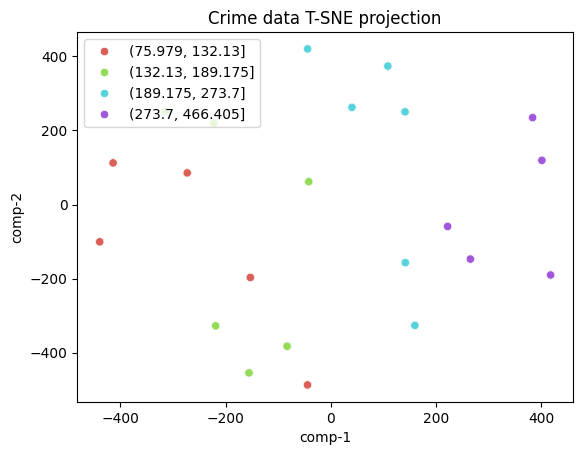

In [44]:
from sklearn.manifold import TSNE
import seaborn as sns
# Initialize the t-SNE model
tsne_model = TSNE(n_components=2, verbose=1, random_state=42)

# Fit the model to the data
tsne_data = tsne_model.fit_transform(features_df)
tsne_df = pd.DataFrame()
tsne_df["comp-1"]=tsne_data[:,0]
tsne_df["comp-2"]=tsne_data[:,1]

# Binning
n_bins = 4
tsne_df["y"]= pd.qcut(merged_df_spy["Close"],n_bins)
print("Length:",len(tsne_df))
# Visualize the low-dimensional data
palette = sns.color_palette("hls", n_bins)
sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=palette,
                data=tsne_df).set(title="Crime data T-SNE projection")


In [45]:
tsne_df.head()

,comp-1,comp-2,y
0,-44.505058,-486.718353,"(75.979, 132.13]"
1,-44.505058,-486.718353,"(75.979, 132.13]"
2,-44.505058,-486.718353,"(75.979, 132.13]"
3,-155.732132,-454.175629,"(75.979, 132.13]"
4,-155.732132,-454.175629,"(75.979, 132.13]"


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2)

# # Define and fit the Multinomial Naive Bayes model
model = MultinomialNB(alpha=0.5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-Score:", f1)